In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\mille\Conda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('/Users/mille/Desktop/NCHS_-_Leading_Causes_of_Death__United_States.csv')
"""The data was obtained at from Data.gov Department of Health: https://catalog.data.gov/dataset/age-adjusted-death-rates-for-the-top-10-leading-causes-of-death-united-states-2013"""

'The data was obtained at from Data.gov Department of Health: https://catalog.data.gov/dataset/age-adjusted-death-rates-for-the-top-10-leading-causes-of-death-united-states-2013'

In [3]:
df.head()

,Year,113_Cause_Name,Cause_Name,State,Deaths,Age_Adjusted_Death_Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


'This is a distribution plot of the Age_Adjusted_Death_Rate. The high frequence may indicate an high death rate amonng a certain age. To explore this we would look at the descriptive statistics on range, mean, mode, min/max, and standard deviation. '

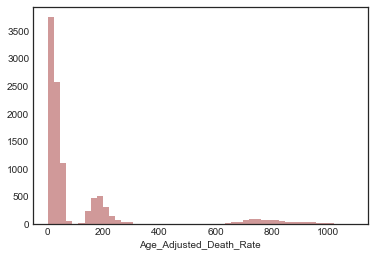

In [5]:
sns.distplot(df['Age_Adjusted_Death_Rate'].dropna(),kde=False,color='darkred',bins=50)

"""This is a distribution plot of the Age_Adjusted_Death_Rate. The high frequence may indicate an high death rate amonng a certain age. To explore this we would look at the descriptive statistics on range, mean, mode, min/max, and standard deviation. """

'The figure below is a scatter plot of Age_Adjusted_Death_Rate by Deaths. The vast majority of deaths fall below 7000 deaths. \nThe data is distributed more widely from 40 on the Age_Adjusted_Death_Rate.'

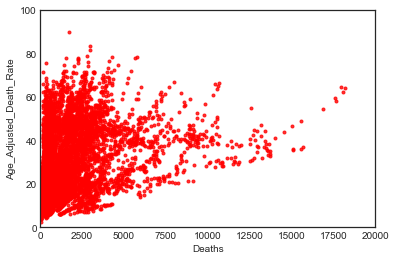

In [7]:
sns.regplot(df.Deaths, df.Age_Adjusted_Death_Rate, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,20000)
plt.ylim(0, 100);

"""The figure below is a scatter plot of Age_Adjusted_Death_Rate by Deaths. The vast majority of deaths fall below 7000 deaths. 
The data is distributed more widely from 40 on the Age_Adjusted_Death_Rate."""

In [12]:
df.groupby('State').describe()
#Table of descriptive statistics by State compared to Age_Adjusted_Death_Rate and Deaths. 
#This table provides the mean, std, min, and confidence intervals.

Age_Adjusted_Death_Rate                                \
                                       count        mean         std   min   
State                                                                        
Alabama                                198.0  153.771212  268.450212  11.4   
Alaska                                 198.0  123.548485  215.334628   6.8   
Arizona                                198.0  117.565657  204.227227   4.1   
Arkansas                               198.0  148.700505  256.072894  12.6   
California                             198.0  113.208081  194.976017   6.2   
Colorado                               198.0  114.018687  199.726720   8.5   
Connecticut                            198.0  111.016162  196.196011   7.3   
Delaware                               198.0  128.118182  224.971008   9.1   
District of Columbia                   198.0  138.572727  255.003717   3.8   
Florida                                198.0  116.501515  204.365113   8.5   
Georgia                                198.0  138.725253  245.037560  10.3   
Hawaii                                 198.0   99.476263  175.002682   8.2   
Idaho                                  198.0  121.405051  210.205968   7.0   
Illinois                               198.0  126.488889  221.238052   7.9   
Indiana                                198.0  137.913131  239.049566  10.4   
Iowa                                   198.0  120.655556  207.745939   5.8   
Kansas                                 198.0  126.777273  220.593534  10.9   
Kentucky                               198.0  152.731818  262.123579  11.6   
Louisiana                              198.0  151.422727  263.807645  10.3   
Maine                                  198.0  126.475253  219.782642  10.0   
Maryland                               198.0  123.959091  221.725394   8.3   
Massachusetts                          198.0  114.511111  203.371761   6.0   
Michigan                               198.0  132.783838  230.724912   9.9   
Minnesota                              198.0  108.394949  191.583373   7.8   
Mississippi                            198.0  159.860101  276.162425  10.5   
Missouri                               198.0  138.572727  238.604098  11.8   
Montana                                198.0  125.338889  217.751196   8.0   
Nebraska                               198.0  119.323737  209.177540   9.3   
Nevada                                 198.0  134.449495  234.959785   8.8   
New Hampshire                          198.0  119.246970  206.970988   8.0   
New Jersey                             198.0  118.310101  209.378300   6.1   
New Mexico                             198.0  123.384343  215.390796   9.3   
New York                               198.0  115.604545  203.565775   5.9   
North Carolina                         198.0  134.437879  234.789476  11.0   
North Dakota                           198.0  116.869697  200.466518   6.2   
Ohio                                   198.0  137.042424  238.742876   9.3   
Oklahoma                               198.0  152.143939  261.356673  11.9   
Oregon                                 198.0  120.882323  211.944087   6.8   
Pennsylvania                           198.0  129.740909  227.335744  10.2   
Rhode Island                           198.0  119.978283  210.820913   6.3   
South Carolina                         198.0  140.930808  246.688421  10.5   
South Dakota                           198.0  120.801010  206.167564   4.5   
Tennessee                              198.0  149.023232  257.400364  10.2   
Texas                                  198.0  128.759596  225.014166  10.2   
United States                          198.0  125.506061  218.414758  10.4   
Utah                                   198.0  114.024242  203.638346   9.1   
Vermont                                198.0  119.244444  206.643772   2.6   
Virginia                               198.0  125.538384  220.549819  10.8   
Washington                             198.

'This is a scatter plot of Deaths by Age_Adjusted_Death_Rate. In this figure we can see that there are four clusters of data.\nThese groupings are related to age of individuals and deaths. The pull out more information from this figure we would need to look at what is happening with deaths per State.'

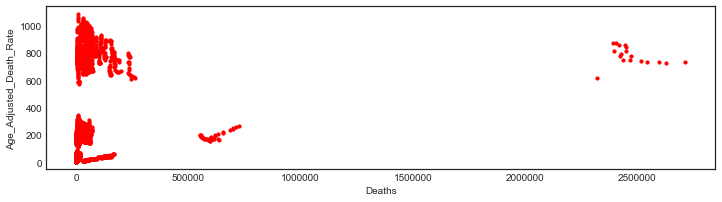

In [17]:
df.plot.scatter(x='Deaths',y='Age_Adjusted_Death_Rate',c='red',s=10,figsize=(12,3))
"""This is a scatter plot of Deaths by Age_Adjusted_Death_Rate. In this figure we can see that there are four clusters of data.
These groupings are related to age of individuals and deaths. The pull out more information from this figure we would need to look at what is happening with deaths per State."""

'Boxplot for Age_Adjusted_Death_Rate. Boxplot indicates that there is a lot of variance with the dataset. '

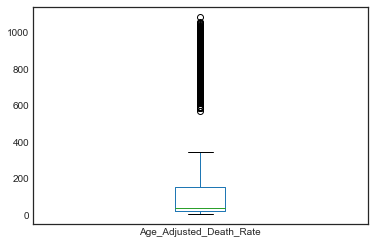

In [22]:
df[['Age_Adjusted_Death_Rate']].plot.box()

"""Boxplot for Age_Adjusted_Death_Rate. Boxplot indicates that there is a lot of variance with the dataset. """

'Distribution plot of Age_Adjusted_Death_Rate. The peak in the figure indicates the highest density of data at that interval.'

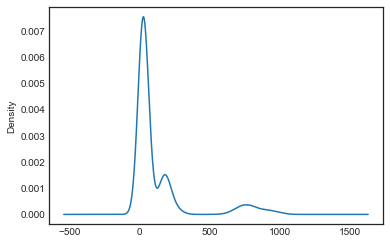

In [24]:
df['Age_Adjusted_Death_Rate'].plot.kde()
"""Distribution plot of Age_Adjusted_Death_Rate. The peak in the figure indicates the highest density of data at that interval."""


'Seaborn pairplot makes a set of subplots to compare the different data variables to States.\nThere are some interesting groupings of the data when deaths and age_adjusted_death_rate is compared to States. '

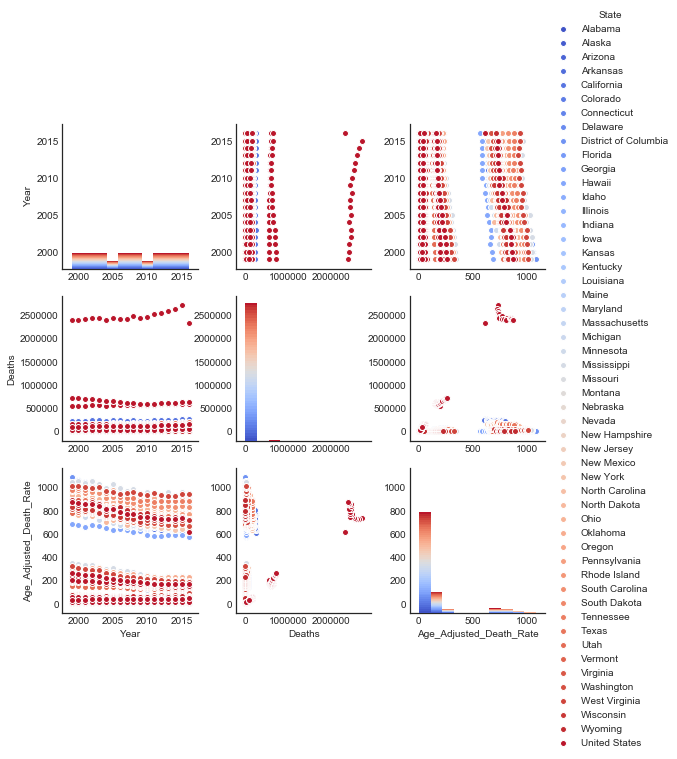

In [28]:
sns.pairplot(df,hue='State',palette='coolwarm')
"""Seaborn pairplot makes a set of subplots to compare the different data variables to States.
There are some interesting groupings of the data when deaths and age_adjusted_death_rate is compared to States. """

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


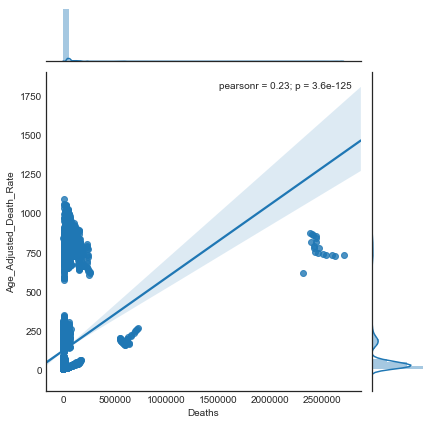

In [32]:
sns.jointplot(x='Deaths',y='Age_Adjusted_Death_Rate',data=df,kind='reg')

"""Regression analysis plotted with a histogram. This figure gives you a sense of the data distribution and if there is a regression.
The light blue shaded area on either side of the regression line indicates the error in the model. Since there is more data closer to the y-axis and fewer as you move right it is skewing the data."""

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


'This is another view of a boxplot, but looking at it horizontally. The boxplot itself indicates the min, median, and max.\nWhile the boxplot is divided into quartiles indicating the strength of the data relationships. \nThe series of black dots beyond the boxplot indicate outliers. '

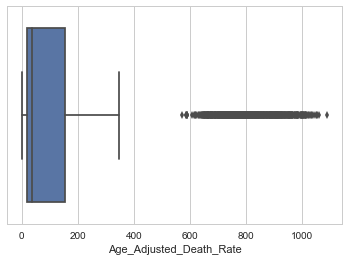

In [38]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Age_Adjusted_Death_Rate"])
"""This is another view of a boxplot, but looking at it horizontally. The boxplot itself indicates the min, median, and max.
While the boxplot is divided into quartiles indicating the strength of the data relationships. 
The series of black dots beyond the boxplot indicate outliers. """

In [ ]:
#How do you sort individual states to compare in the data? I would like to figure out how to do that. 